In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import re

# demos=pd.read_csv('demographics.csv')
# demos.drop(demos[demos['Season']==2016].index, inplace=True)
# demos.drop(columns='Unnamed: 0', inplace=True, axis=1)
# demos.info()


I notice that for 2016, the column contain the names of positions instead of numbers. I am going to use height16edits.ipynb to make changes to that year and re-insert the data.

The formatting needed to combine the datasets is done, so we can remove the code from our runs.

In [2]:
# sixteen=pd.read_csv('sixteen.csv')
# sixteen=sixteen.drop(columns='Unnamed: 0',axis=1)
# print(demos.columns)
# print(sixteen.columns)

In [3]:

# cols_sixteen = set(sixteen.columns)
# cols_demos = set(demos.columns)

# only_in_sixteen = cols_sixteen - cols_demos
# only_in_demos = cols_demos - cols_sixteen

# print("Columns in sixteen but not in demos:", only_in_sixteen)
# print("Columns in demos but not in sixteen:", only_in_demos)
# demos=demos.drop(columns=only_in_demos, axis=1)

In [4]:
# demos.head()

In [5]:
# demofinal=pd.merge(sixteen, demos, on=['Season','TeamName','Size','SizeRank','Hgt5','Hgt5Rank','Hgt4','Hgt4Rank','Hgt3','Hgt3Rank','Hgt2','Hgt2Rank','Hgt1','Hgt1Rank','HgtEff','HgtEffRank','Exp','ExpRank','Bench','BenchRank','Pts5','Pts5Rank','Pts4','Pts4Rank','Pts3','Pts3Rank','Pts2','Pts2Rank','Pts1','Pts1Rank','OR5','OR5Rank','OR4','OR4Rank','OR3','OR3Rank','OR2','OR2Rank','OR1','OR1Rank','DR5','DR5Rank','DR4','DR4Rank','DR3','DR3Rank','DR2','DR2Rank','DR1','DR1Rank'], how='outer')

In [6]:
# demofinal.to_csv('finalheights.csv')

In [7]:
demofinal=pd.read_csv('finalheights.csv', index_col = 0)

In [8]:
demofinal=demofinal[demofinal.columns.drop(list(demofinal.filter(regex='Rank')))]

In [9]:
demofinal.head()

,Season,TeamName,Size,Hgt5,Hgt4,Hgt3,Hgt2,Hgt1,HgtEff,Exp,...,OR5,OR4,OR3,OR2,OR1,DR5,DR4,DR3,DR2,DR1
0,2007,Air Force,77.00,-0.69,-0.06,1.07,1.32,2.47,-0.75,2.61,...,21.74,25.11,18.12,24.00,11.03,23.29,24.96,18.92,14.67,18.17
1,2007,Akron,75.76,-1.52,0.47,-2.08,-1.85,0.47,-1.05,2.09,...,27.05,28.40,31.45,7.71,5.38,22.97,24.52,28.40,12.05,12.05
2,2007,Alabama,77.65,0.52,0.26,2.07,1.39,0.31,0.78,1.41,...,23.41,37.60,22.21,11.41,5.36,32.71,29.21,17.16,12.68,8.24
3,2007,Alabama A&M,77.01,1.75,-1.17,0.07,1.15,1.47,0.58,0.77,...,25.17,29.00,11.99,15.91,17.92,34.37,21.22,13.70,15.21,15.49
4,2007,Alabama St.,76.28,-1.16,-0.26,1.07,1.20,-1.53,-1.42,1.91,...,28.95,30.34,17.95,17.56,5.20,29.66,24.80,14.84,13.82,16.88


In [10]:
demofinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6670 entries, 0 to 6669
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    6670 non-null   int64  
 1   TeamName  6670 non-null   object 
 2   Size      6670 non-null   float64
 3   Hgt5      6670 non-null   float64
 4   Hgt4      6670 non-null   float64
 5   Hgt3      6670 non-null   float64
 6   Hgt2      6670 non-null   float64
 7   Hgt1      6670 non-null   float64
 8   HgtEff    6670 non-null   float64
 9   Exp       6670 non-null   float64
 10  Bench     6670 non-null   float64
 11  Pts5      6670 non-null   float64
 12  Pts4      6670 non-null   float64
 13  Pts3      6670 non-null   float64
 14  Pts2      6670 non-null   float64
 15  Pts1      6670 non-null   float64
 16  OR5       6670 non-null   float64
 17  OR4       6670 non-null   float64
 18  OR3       6670 non-null   float64
 19  OR2       6670 non-null   float64
 20  OR1       6670 non-null   float64
 

In [11]:
demofinal=demofinal[demofinal['Size'] !=0]


In [12]:
demofinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6660 entries, 0 to 6669
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    6660 non-null   int64  
 1   TeamName  6660 non-null   object 
 2   Size      6660 non-null   float64
 3   Hgt5      6660 non-null   float64
 4   Hgt4      6660 non-null   float64
 5   Hgt3      6660 non-null   float64
 6   Hgt2      6660 non-null   float64
 7   Hgt1      6660 non-null   float64
 8   HgtEff    6660 non-null   float64
 9   Exp       6660 non-null   float64
 10  Bench     6660 non-null   float64
 11  Pts5      6660 non-null   float64
 12  Pts4      6660 non-null   float64
 13  Pts3      6660 non-null   float64
 14  Pts2      6660 non-null   float64
 15  Pts1      6660 non-null   float64
 16  OR5       6660 non-null   float64
 17  OR4       6660 non-null   float64
 18  OR3       6660 non-null   float64
 19  OR2       6660 non-null   float64
 20  OR1       6660 non-null   float64
 

In [13]:
# demofinal.to_csv('bigtime.csv')

We have 

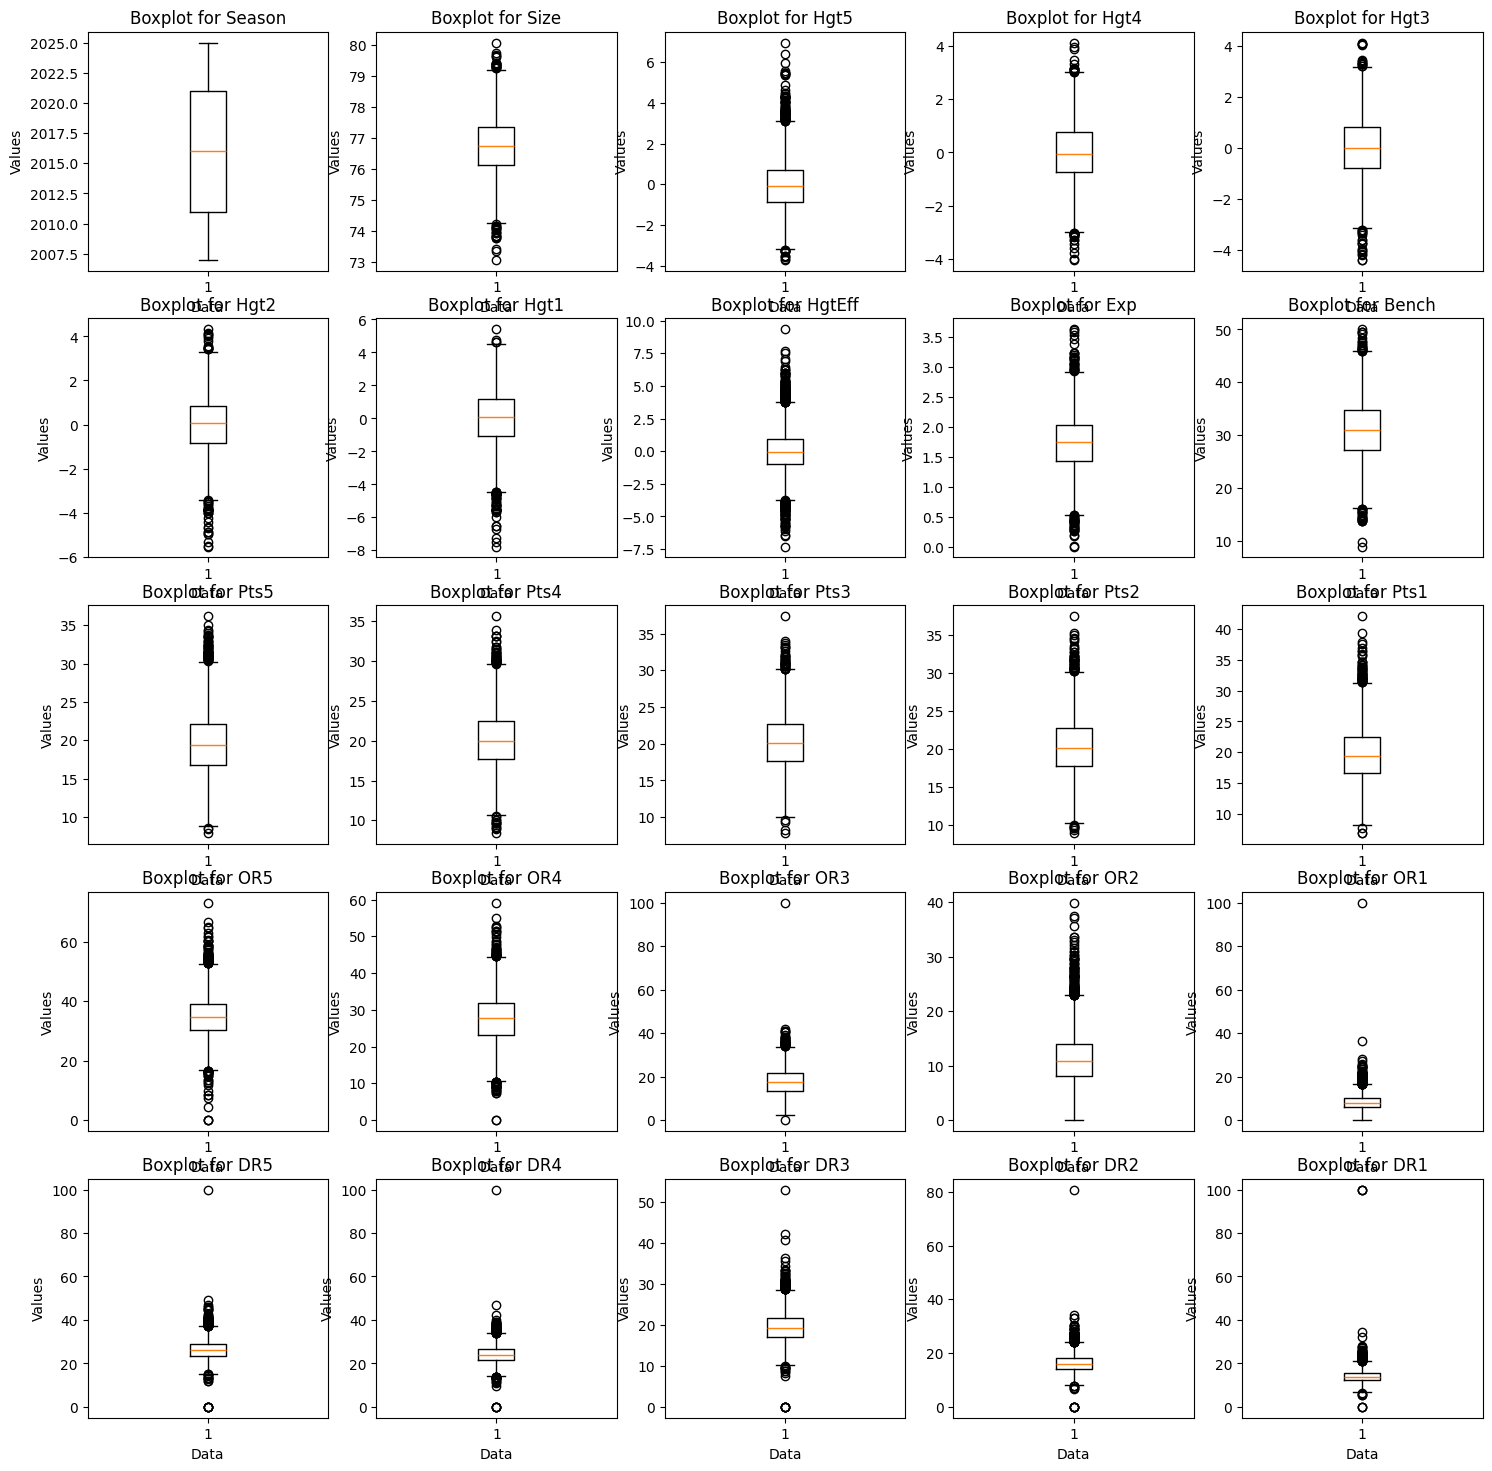

In [14]:
numerical=demofinal.select_dtypes(exclude='object')
fig, ax=plt.subplots(nrows=5, ncols=5, figsize=(18,18))
ax=ax.flatten()
for i,col in enumerate(numerical.columns):
    ax[i].boxplot(numerical[col])
    ax[i].set_title(f'Boxplot for {col}')
    ax[i].set_xlabel('Data')
    ax[i].set_ylabel('Values')
plt.show()

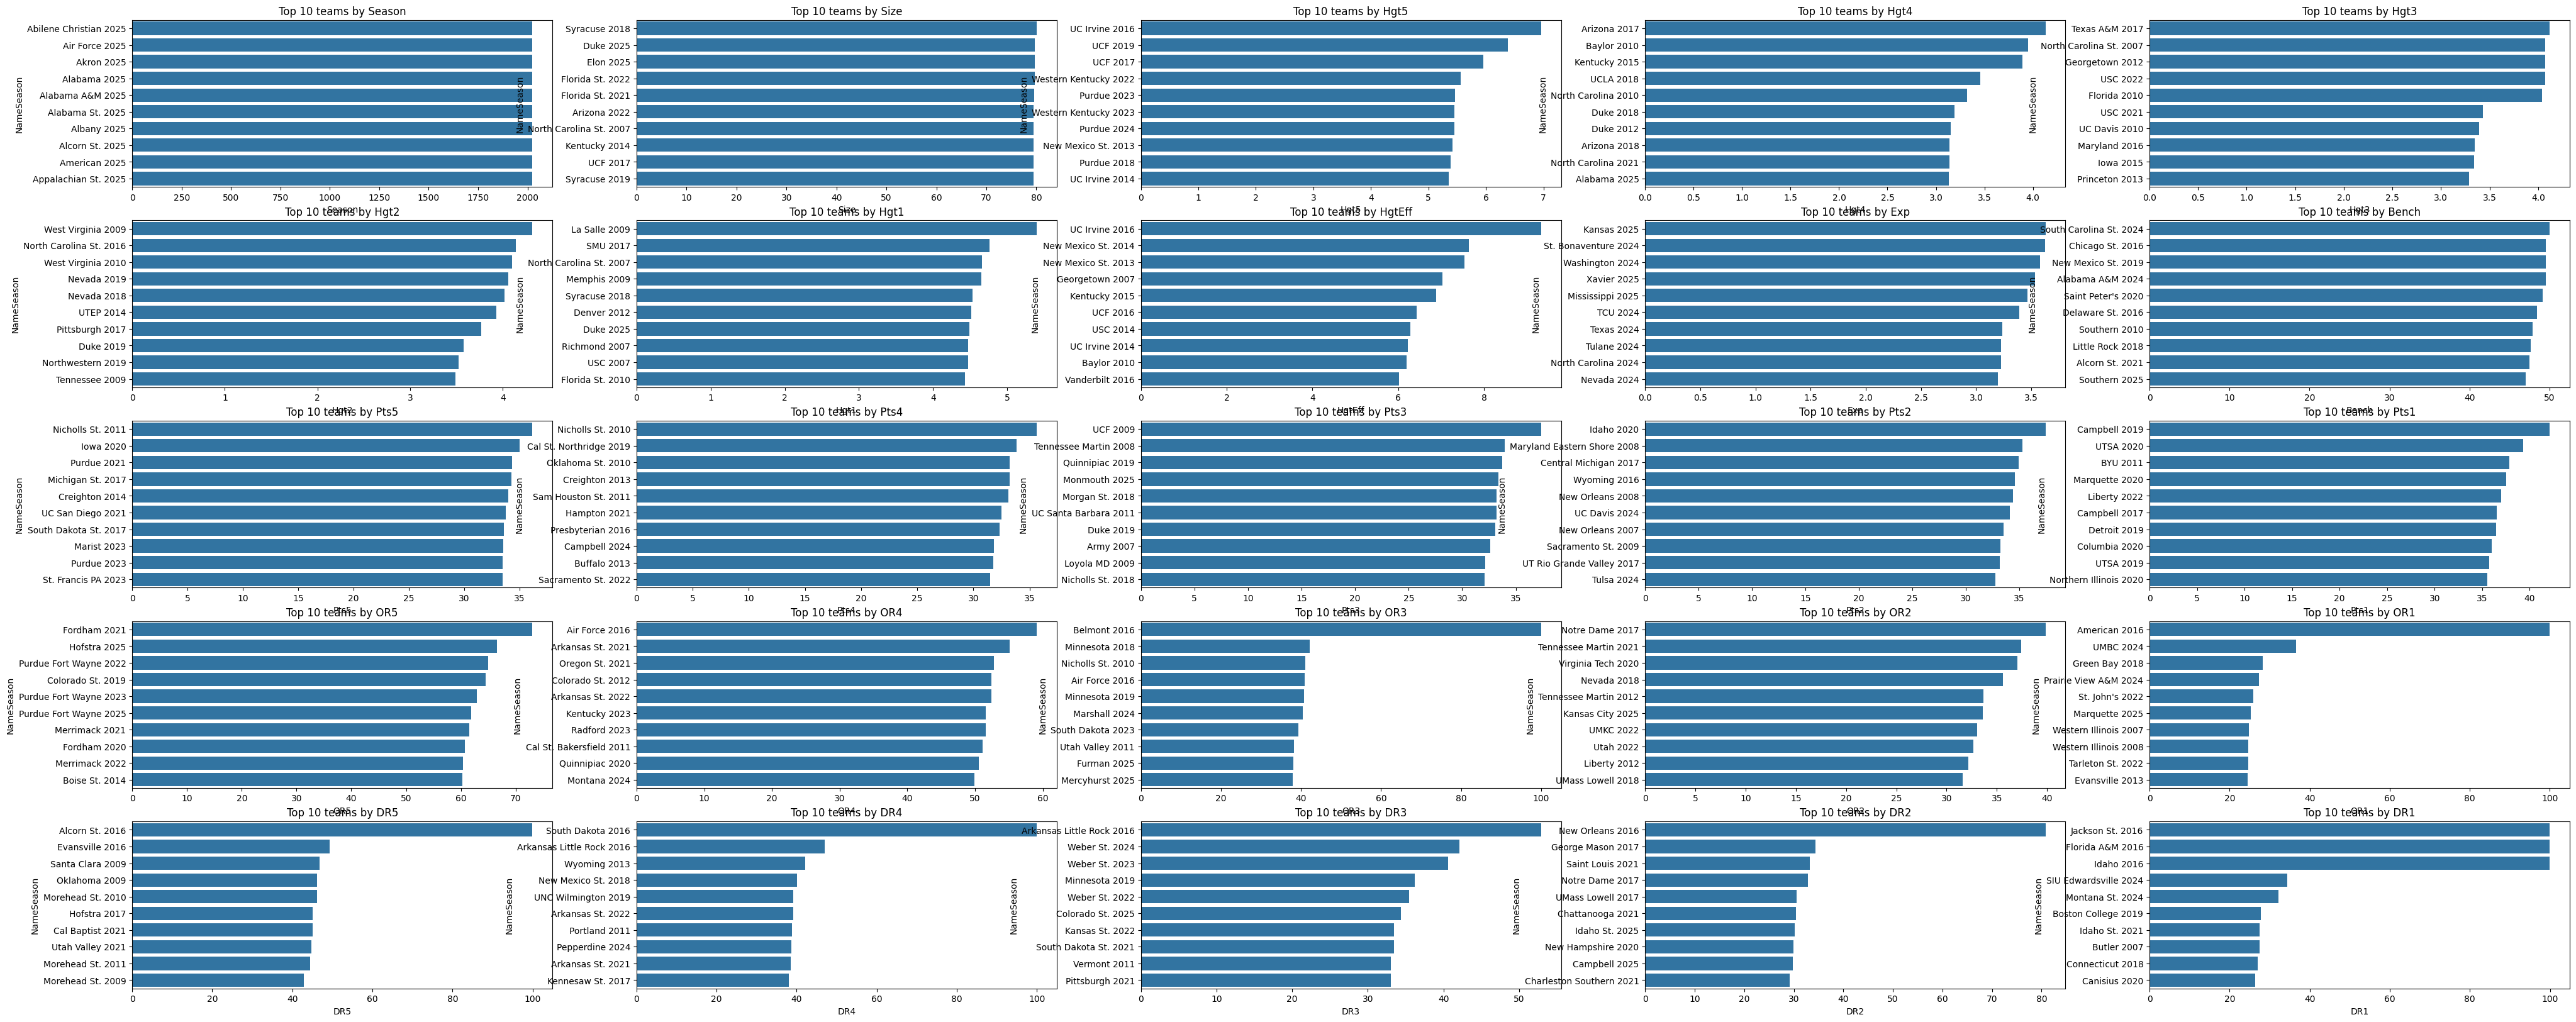

In [15]:
fig, ax=plt.subplots(nrows=5, ncols=5, figsize=(50,20))
ax=ax.flatten()
for i, col in enumerate(numerical.columns):
    top_10=demofinal.nlargest(10, col)
    for index,row in top_10.iterrows():
        top_10.at[index, 'NameSeason']= f"{row['TeamName']} {row['Season']}"
    sns.barplot(x=top_10[col],y=top_10['NameSeason'], ax=ax[i])
    ax[i].set_title(f'Top 10 teams by {col}')
    ax[i].set_xlabel(f'{col}')
plt.show()


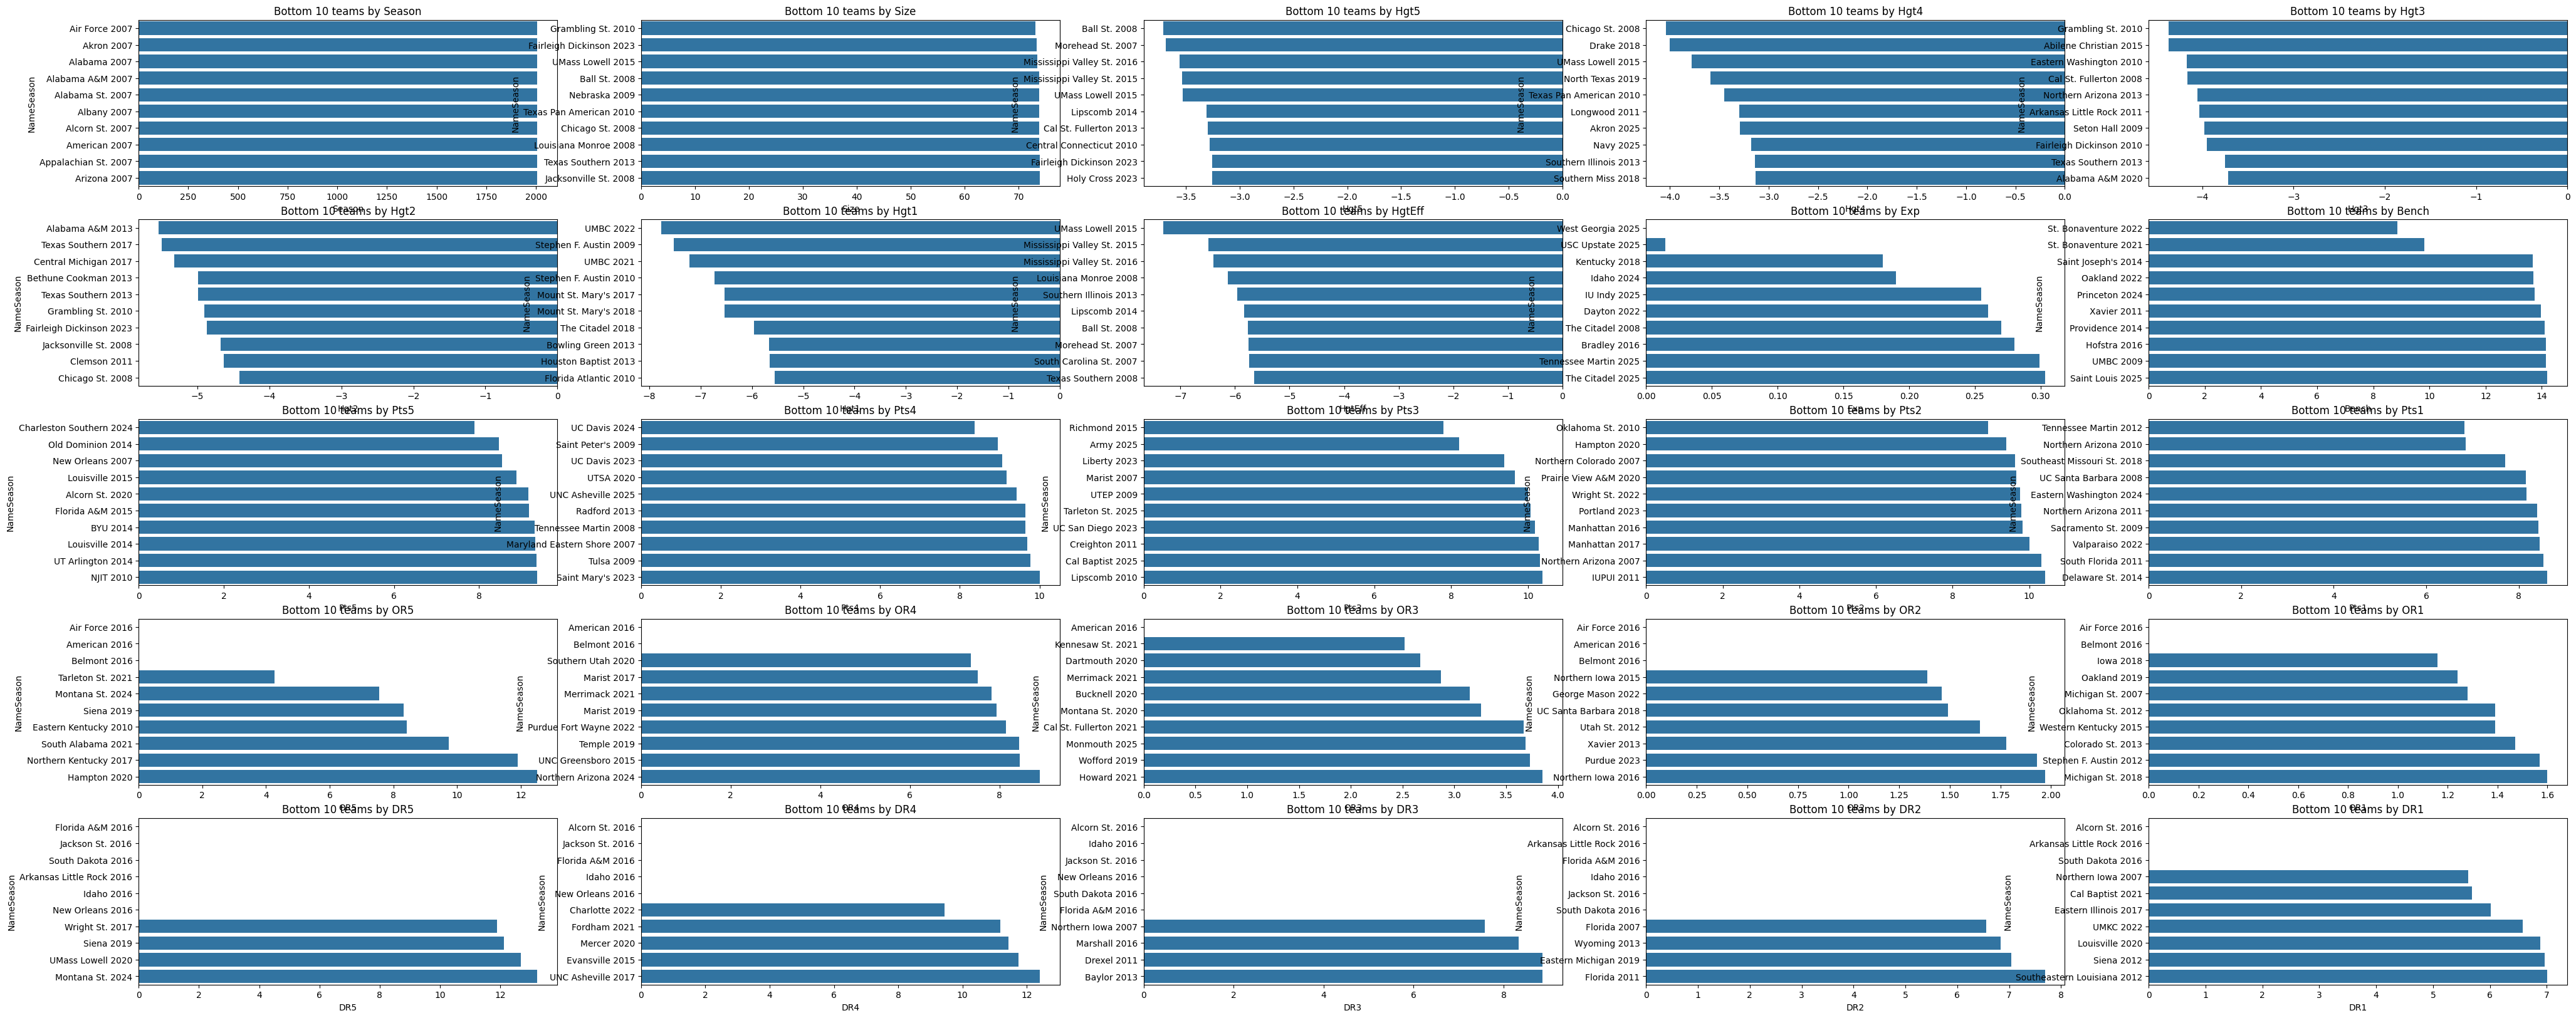

In [16]:
fig, ax=plt.subplots(nrows=5, ncols=5, figsize=(50,20))
ax=ax.flatten()
for i, col in enumerate(numerical.columns):
    top_10=demofinal.nsmallest(10, col)
    for index,row in top_10.iterrows():
        top_10.at[index, 'NameSeason']= f"{row['TeamName']} {row['Season']}"
    sns.barplot(x=top_10[col],y=top_10['NameSeason'], ax=ax[i])
    ax[i].set_title(f'Bottom 10 teams by {col}')
    ax[i].set_xlabel(f'{col}')
plt.show()

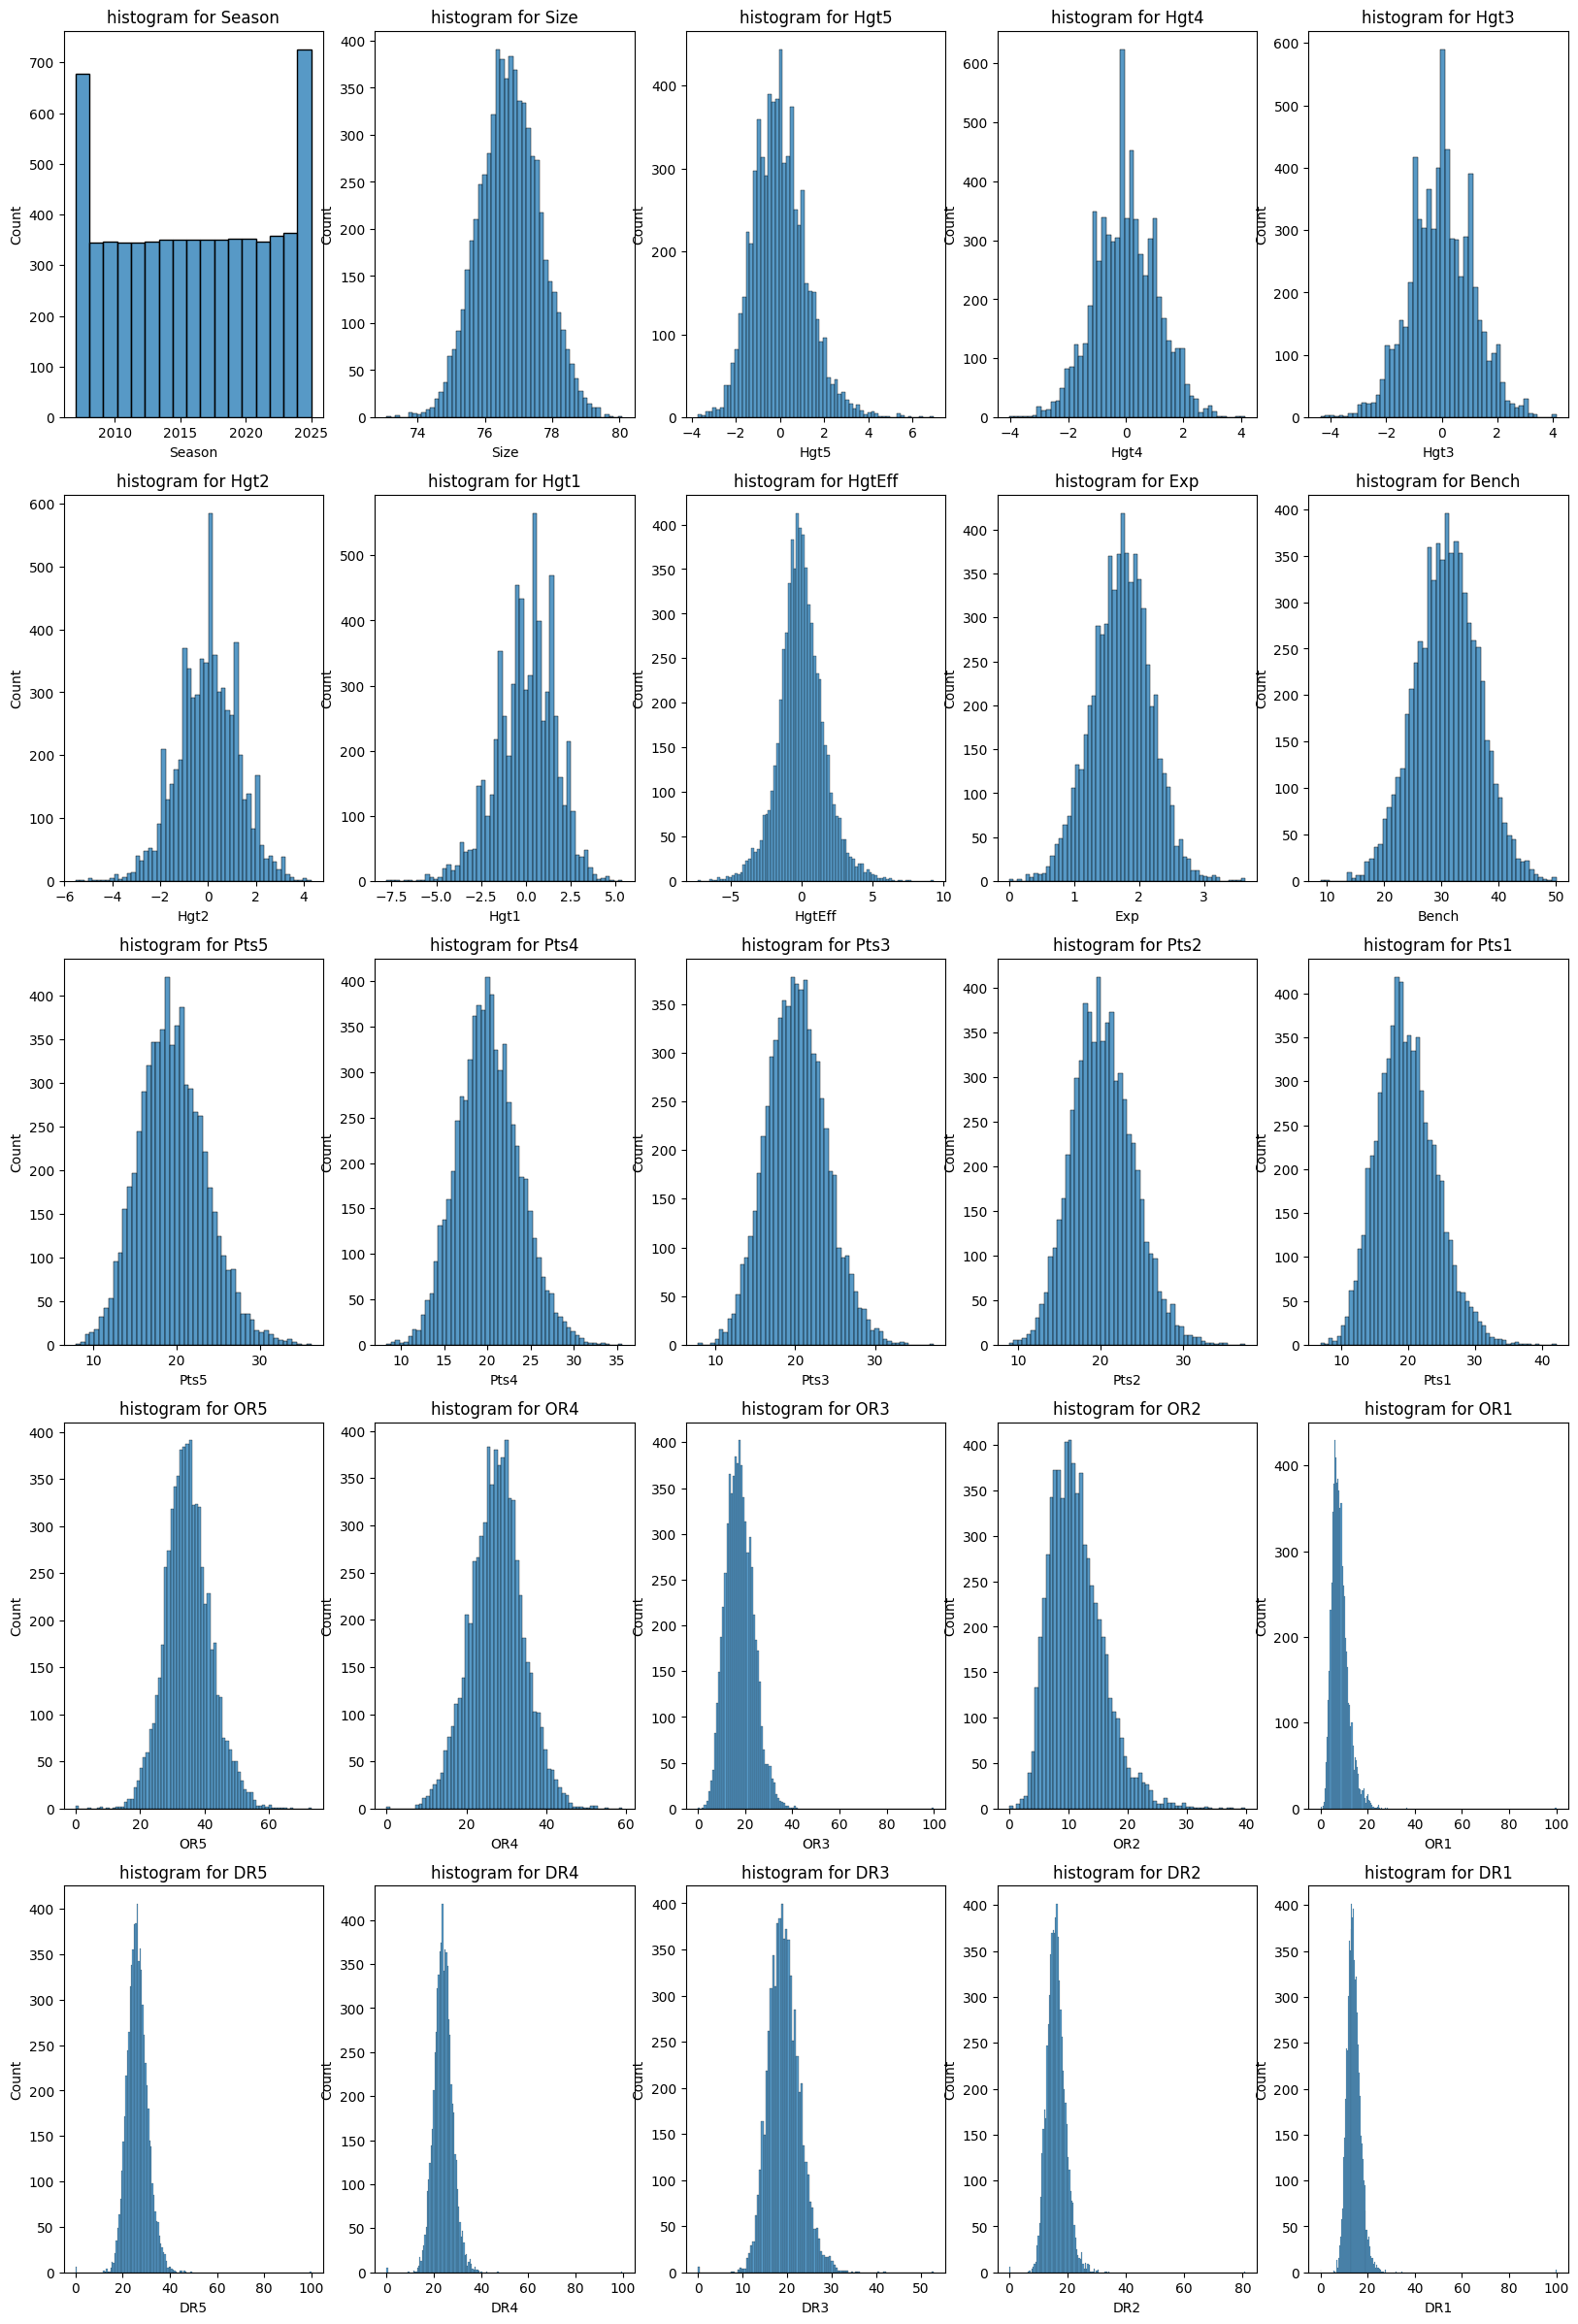

In [17]:
fig, ax=plt.subplots(nrows=5, ncols=5, figsize=(20,30))
ax=ax.flatten()
for i,col in enumerate(numerical.columns): 
    sns.histplot(numerical[col], ax=ax[i])
    ax[i].set_title(f'histogram for {col}')
    
plt.show()

We run into the same problem as before with teams that opted out of the pandemic year.
Because those teams do not have rosters (and therefore Size values of 0.0), we can easily drop them.

In [18]:
demofinal=demofinal[demofinal['Size'] > 0.0]

We also have a skew issue, caused by a few outliers in the OR and DR columns. let's drop all OR and DR percentages over 60 and reassess.

In [29]:
mask = demofinal.columns.str.contains('OR|DR', regex = True)
rebounds = demofinal.loc[:,mask]
for col in rebounds:
    demofinal = demofinal[demofinal[col] < 60]

Now let's take a look at the revised histograms and skew.

In [ ]:
numericals = demofinal.select_dtypes(exclude = 'object')
fig, ax=plt.subplots(nrows=5, ncols=5, figsize=(20,30))
ax=ax.flatten()
for i,col in enumerate(numericals.columns): 
    sns.histplot(numerical[col], ax=ax[i])
    ax[i].set_title(f'histogram for {col}')
    
plt.show()

In [30]:
demofinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6641 entries, 0 to 6669
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    6641 non-null   int64  
 1   TeamName  6641 non-null   object 
 2   Size      6641 non-null   float64
 3   Hgt5      6641 non-null   float64
 4   Hgt4      6641 non-null   float64
 5   Hgt3      6641 non-null   float64
 6   Hgt2      6641 non-null   float64
 7   Hgt1      6641 non-null   float64
 8   HgtEff    6641 non-null   float64
 9   Exp       6641 non-null   float64
 10  Bench     6641 non-null   float64
 11  Pts5      6641 non-null   float64
 12  Pts4      6641 non-null   float64
 13  Pts3      6641 non-null   float64
 14  Pts2      6641 non-null   float64
 15  Pts1      6641 non-null   float64
 16  OR5       6641 non-null   float64
 17  OR4       6641 non-null   float64
 18  OR3       6641 non-null   float64
 19  OR2       6641 non-null   float64
 20  OR1       6641 non-null   float64
 

Skewness and Kurtosis of Data

In [31]:
numerical=demofinal.select_dtypes(exclude='object')
numerical.skew(axis=0, skipna=True)

Season   -0.016785
Size      0.031161
Hgt5      0.519029
Hgt4      0.022166
Hgt3      0.009838
Hgt2     -0.115868
Hgt1     -0.376573
HgtEff    0.207757
Exp      -0.057380
Bench    -0.016209
Pts5      0.316580
Pts4      0.218948
Pts3      0.202743
Pts2      0.286500
Pts1      0.397975
OR5       0.165318
OR4       0.063370
OR3       0.368287
OR2       0.916893
OR1       1.144174
DR5       0.369366
DR4       0.274012
DR3       0.584116
DR2       0.551327
DR1       0.655832
dtype: float64

In [32]:
numerical.kurtosis(axis=0,skipna=True)

Season   -1.209135
Size     -0.033141
Hgt5      0.960208
Hgt4      0.021951
Hgt3      0.193927
Hgt2      0.273900
Hgt1      0.358661
HgtEff    1.387064
Exp       0.259770
Bench    -0.018348
Pts5      0.161134
Pts4      0.072374
Pts3      0.061126
Pts2      0.158149
Pts1      0.249380
OR5       0.370804
OR4       0.206844
OR3       0.063520
OR2       1.595326
OR1       2.355960
DR5       0.782710
DR4       0.591567
DR3       1.933298
DR2       1.103364
DR1       1.404328
dtype: float64

The issues in this dataset appear to be arising from the Offensive and Defensive Rebounding columns; this may be caused by outliers, which have been appearing in the visualizations.
I may have to run IQR drops on the offending columns to correct the issue.

Correlation Analysis, broken up by relevant information clusters (experience, height, rebounding numbers)

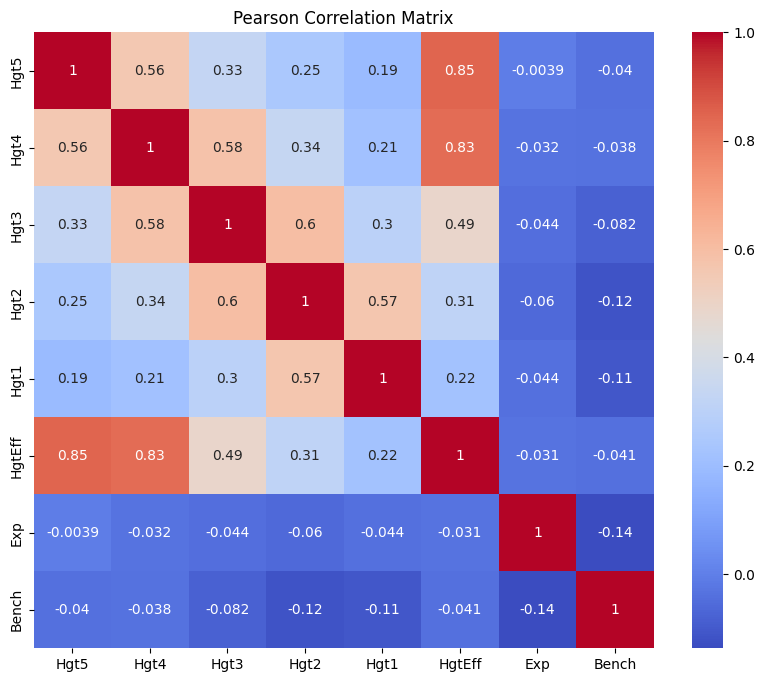

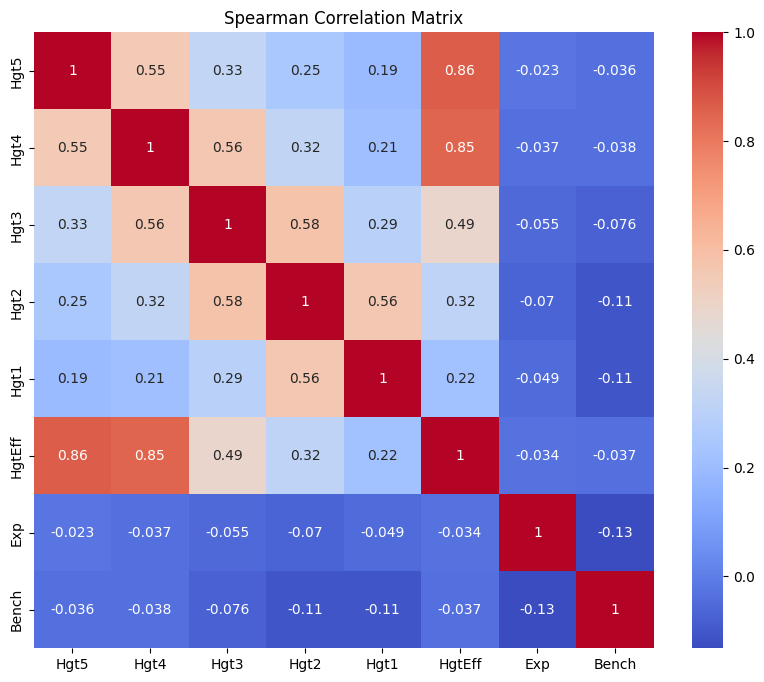

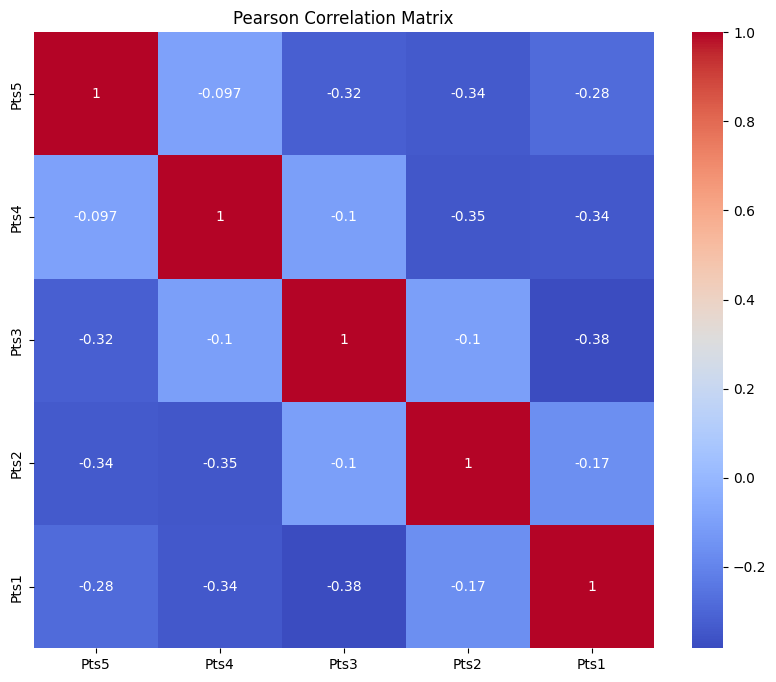

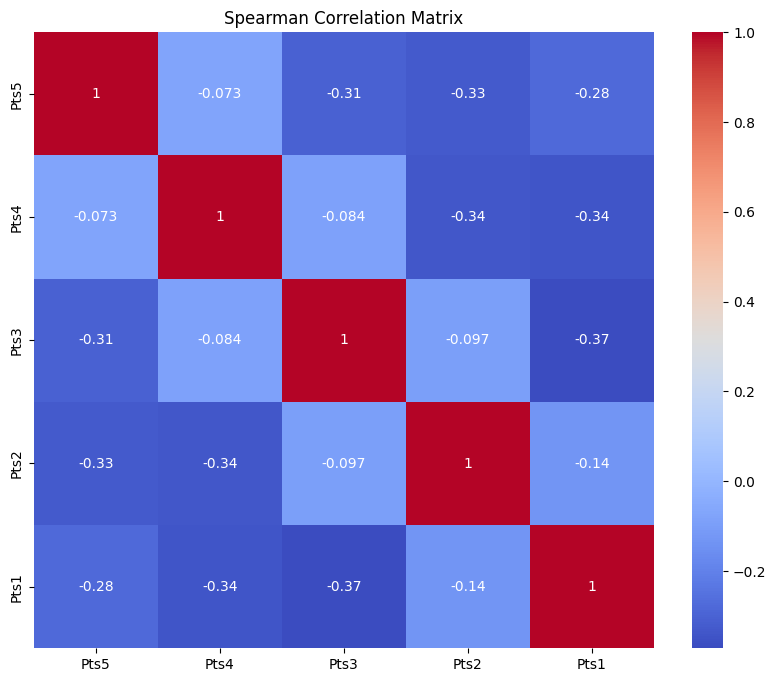

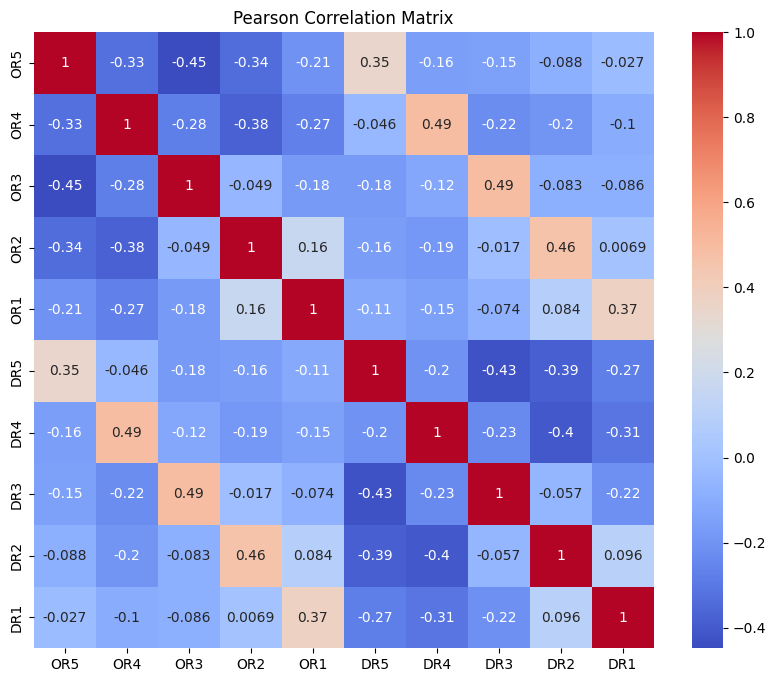

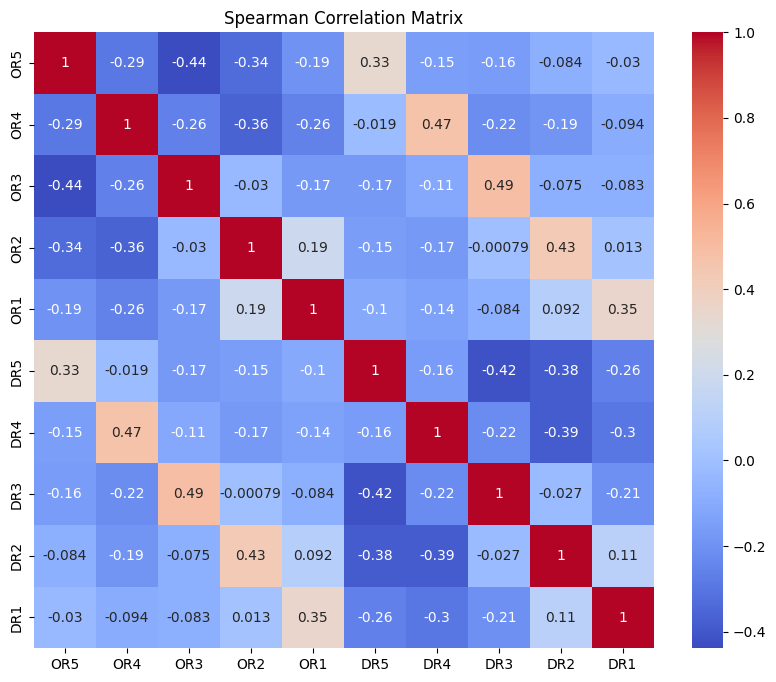

In [33]:
mask=numerical.columns.str.contains('Hgt|Exp|Bench', regex=True)
masktwo=numerical.columns.str.contains('Pts', regex=True)
maskthree=numerical.columns.str.contains('OR|DR',regex=True)
height_exp=numerical.loc[:,mask]
Pts=numerical.loc[:,masktwo]
Res=numerical.loc[:,maskthree]

for x in (height_exp,Pts,Res):
    pearson=x.corr(method='pearson')
    spearman=x.corr(method='spearman')
    plt.figure(figsize=(10,8))
    sns.heatmap(pearson, annot=True, cmap='coolwarm')
    plt.title('Pearson Correlation Matrix')
    plt.show()  

    plt.figure(figsize=(10,8))
    sns.heatmap(spearman, annot=True, cmap='coolwarm')
    plt.title('Spearman Correlation Matrix')
    plt.show()

Variance Inflation Factor for each subset of the demographic data

  features        VIF
0     Hgt5   4.648318
1     Hgt4   4.715453
2     Hgt3   2.086874
3     Hgt2   2.093326
4     Hgt1   1.486223
5   HgtEff  10.305705
6      Exp   9.520541
7    Bench   9.521796


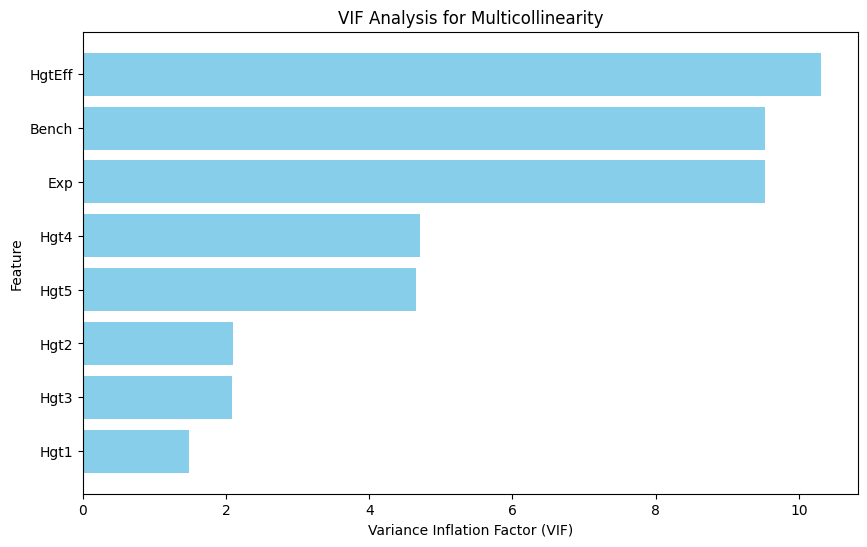

  features        VIF
0     Pts5  16.557984
1     Pts4  22.035787
2     Pts3  20.846824
3     Pts2  20.360096
4     Pts1  14.047720


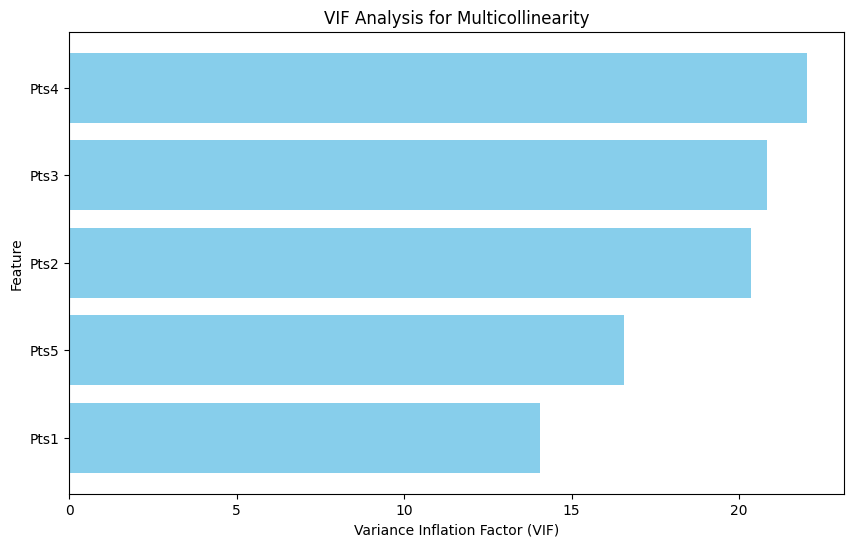

  features           VIF
0      OR5  6.900166e+06
1      OR4  4.394061e+06
2      OR3  1.895572e+06
3      OR2  8.195989e+05
4      OR1  4.444605e+05
5      DR5  3.868491e+06
6      DR4  3.226804e+06
7      DR3  2.120573e+06
8      DR2  1.472943e+06
9      DR1  1.131836e+06


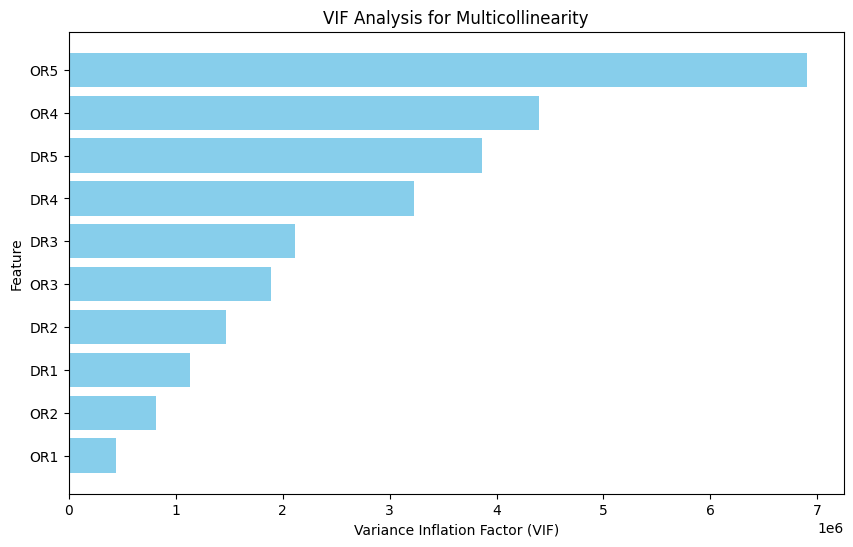

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
for x in (height_exp,Pts,Res):
    vif_data=pd.DataFrame()
    vif_data['features']=x.columns
    vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    print(vif_data)

    vif_data = vif_data.sort_values(by="VIF", ascending=False)


    plt.figure(figsize=(10, 6))
    plt.barh(vif_data["features"], vif_data["VIF"], color="skyblue")
    plt.xlabel("Variance Inflation Factor (VIF)")
    plt.ylabel("Feature")
    plt.title("VIF Analysis for Multicollinearity")
    plt.gca().invert_yaxis()  
    plt.show()

Multivariate Analysis 

In [35]:
multivariatecopy=demofinal.copy(deep=True)
multivariatecopy['Team/Year']=multivariatecopy['Season'].astype(str) + ' ' +multivariatecopy['TeamName']

multivariatecopy=multivariatecopy.drop(columns=['Season','TeamName'], axis=1)

In [36]:
popper=multivariatecopy.pop('Team/Year')
multivariatecopy.insert(0,'Team/Year',popper)

In [37]:
import plotly.express as px
fig = px.scatter(
multivariatecopy,
x='HgtEff',
y='Exp',
hover_name='Team/Year',
title='relationship between effective height and average experience'
)
fig.show()

In [27]:
fig = px.scatter(
multivariatecopy,
x='HgtEff',
y='Hgt3',
hover_name='Team/Year',
title='Finding teams whose effective height are most closely tied to the heights of their small forwards'
)
fig.show()

In [40]:
multivariatecopy.to_csv('modelreadydemographics.csv', index=False)